### CS 439 Introduction to Data Science



**NOTE** click near here to select this cell, esc-Enter will get you into cell edit mode, shift-Enter gets you back

**Name**: Abdullah Khan

**Student ID**: 2017023


Homework 2: Exploratory Data Analysis
===

## Overview

Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis. 

### The Dataset

that we'll use can be found at:

https://archive.ics.uci.edu/ml/datasets/Abalone

Its a dataset containing various attributes of Abalone specimens, in particular the number of "rings" (last column) that shows the approximate age of the specimen. The dataset is typically used to predict number of rings from other attributes (supervised learning).

The data directory contains these files:

* **abalone.data**, A csv file with data on a number of abalone specimens.
* **abalone.names**, A text file with background information on the dataset.

Create a HW2 directory on your VM or Linux Machine and download this data into it. 

### Deliverables

Complete the all the exercises below and turn in a write up in the form of an IPython notebook, that is, **an .ipynb file**.
The write up should include your code, answers to exercise questions, and plots of results.
The submission will be as an assignment on MS Teams with this file (after your edits) as an attachment. 

You can use this notebook and fill in answers inline, or if you prefer, do your write up in a separate notebook.
Don't forget to include answers to questions that ask for natural language responses, i.e., in English, not code!

We would prefer to test some of your code automatically, so please try to submit a notebook that uses the function names requested by the questions and that can be executed with "Cell > Run all".

### Guidelines

#### Code

This assignment can be done with basic python and matplotlib.
Feel free to use PANDAs, too, which you may find well suited to several exercises.
As for other libraries, please check with course instructor whether they're allowed.
In general, we want you to use whatever is comfortable, except for libraries that include functionality covered in the assignment.

You're not required to do your coding in IPython, so feel free to use your favorite editor or IDE.
But when you're done, remember to put your code into a notebook for your write up.

#### Collaboration

This assignment is to be done individually.  Everyone should be getting a hands on experience in this course.  You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Part 0: Reading

### Exercise 0

Step 0 is to read the dataset. First download it from the link above, and save it into a data directory such as the path in the cell below. Look at the first few lines of the file. Notice that most columns are numeric, but the first column is string with one of three values (gender), representing a categorical variable. 

Now construct two versions of the data table. First produce a variable 'abalone_raw' which is a list of records, and each record should be a list of strings. Now construct the variable 'abalone' which is list of list of numbers from it by parsing the numeric strings to float values. For the first column, map the string values to numeric ones and create a dictionary and inverse dictionary to map between the string values and numeric values. 

In [95]:
#by using pandas
import csv
import os
import pandas as pa

# Load data files here...
def loaddatafile(fname):
    lod = pa.read_csv(fname,header=None)
    return lod

def rawtodata(table): 
  # converting the string table to a numeric one 
    table[0] = table[0].map(lambda x: 1 if x == 'M' else 0 if x=='F' else 2)
    return table

abalone_raw = loaddatafile('abalone.data')
abalone = rawtodata(abalone_raw)

## Part 1: Basic Statistics

Create a list of the column names for this dataset from the Dataset description. Preserve the case and the spaces in these names:

In [96]:
colnames=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

Now create a dictionary 'coldict' mapping column name to column, and use this to define a "getcol" function which returns a named column from the abalone table.

In [97]:
coldict = dict(zip(colnames, range(len(colnames))))    


In [98]:
coldict

{'Diameter': 2,
 'Height': 3,
 'Length': 1,
 'Rings': 8,
 'Sex': 0,
 'Shell weight': 7,
 'Shucked weight': 5,
 'Viscera weight': 6,
 'Whole weight': 4}

In [99]:
abalone.columns = colnames

def getcol(colname):
    return abalone[colname]


In [100]:
abalone['Height'].min()

0.0

In [101]:
abalone['Height'].max()

1.13

In [102]:
abalone['Height'].mean()

0.1395163993296614

In [103]:
abalone['Height'].std()

0.04182705660725703

> TODO: What is the min, max, average and std deviation of the Height column?

Ans

Min = 0.0

Max = 1.13

Avg = 0.139

Std = 0.041827

> TODO: Now create a 9 x 5 table. Each row of the table should be a column name followed by the values of min, max, mean and std for that column.

In [94]:
#creating a 9x5 table, using pandas and adding values of min,max ,mean and std in each column
col = pa.DataFrame({colnames[0]:[abalone['Sex'].min(),abalone['Sex'].max(),abalone['Sex'].mean(),abalone['Sex'].std()],
                    colnames[1]:[abalone['Length'].min(),abalone['Length'].max(),abalone['Length'].mean(),abalone['Length'].std()],
                    colnames[2]:[abalone['Diameter'].min(),abalone['Diameter'].max(),abalone['Diameter'].mean(),abalone['Diameter'].std()],
                    colnames[3]:[abalone['Height'].min(),abalone['Height'].max(),abalone['Height'].mean(),abalone['Height'].std()],
                    colnames[4]:[abalone['Whole weight'].min(),abalone['Whole weight'].max(),abalone['Whole weight'].mean(),abalone['Whole weight'].std()],
                    colnames[5]:[abalone['Shucked weight'].min(),abalone['Shucked weight'].max(),abalone['Shucked weight'].mean(),abalone['Shucked weight'].std()],
                    colnames[6]:[abalone['Viscera weight'].min(),abalone['Viscera weight'].max(),abalone['Viscera weight'].mean(),abalone['Viscera weight'].std()],
                    colnames[7]:[abalone['Shell weight'].min(),abalone['Shell weight'].max(),abalone['Shell weight'].mean(),abalone['Shell weight'].std()],
                    colnames[8]:[abalone['Rings'].min(),abalone['Rings'].max(),abalone['Rings'].mean(),abalone['Rings'].std()],
                    })

col = col.T
#naming the attributes of table
col.columns = ['min','max','mean','std']
col

,min,max,mean,std
Sex,0.0000,2.0000,1.008379,0.796410
Length,0.0750,0.8150,0.523992,0.120093
Diameter,0.0550,0.6500,0.407881,0.099240
Height,0.0000,1.1300,0.139516,0.041827
Whole weight,0.0020,2.8255,0.828742,0.490389
Shucked weight,0.0010,1.4880,0.359367,0.221963
Viscera weight,0.0005,0.7600,0.180594,0.109614
Shell weight,0.0015,1.0050,0.238831,0.139203
Rings,1.0000,29.0000,9.933684,3.224169


> TODO: List anything interesting about these values (this is an open-ended question)

If we look closely to values then we will be able to see a positive/greater differences between min and max values which in future will lead to outliers

## Part 2: Histograms

> TODO: Now create a 3x3 grid of histograms, one for each column. Make sure your figure is large enough (should consume most of the width of the page). We recommend you use pylab, and its 'subplots' function. Include the column name as a title above each subfigure. Try to use loops rather than enumerating all 9 column names.

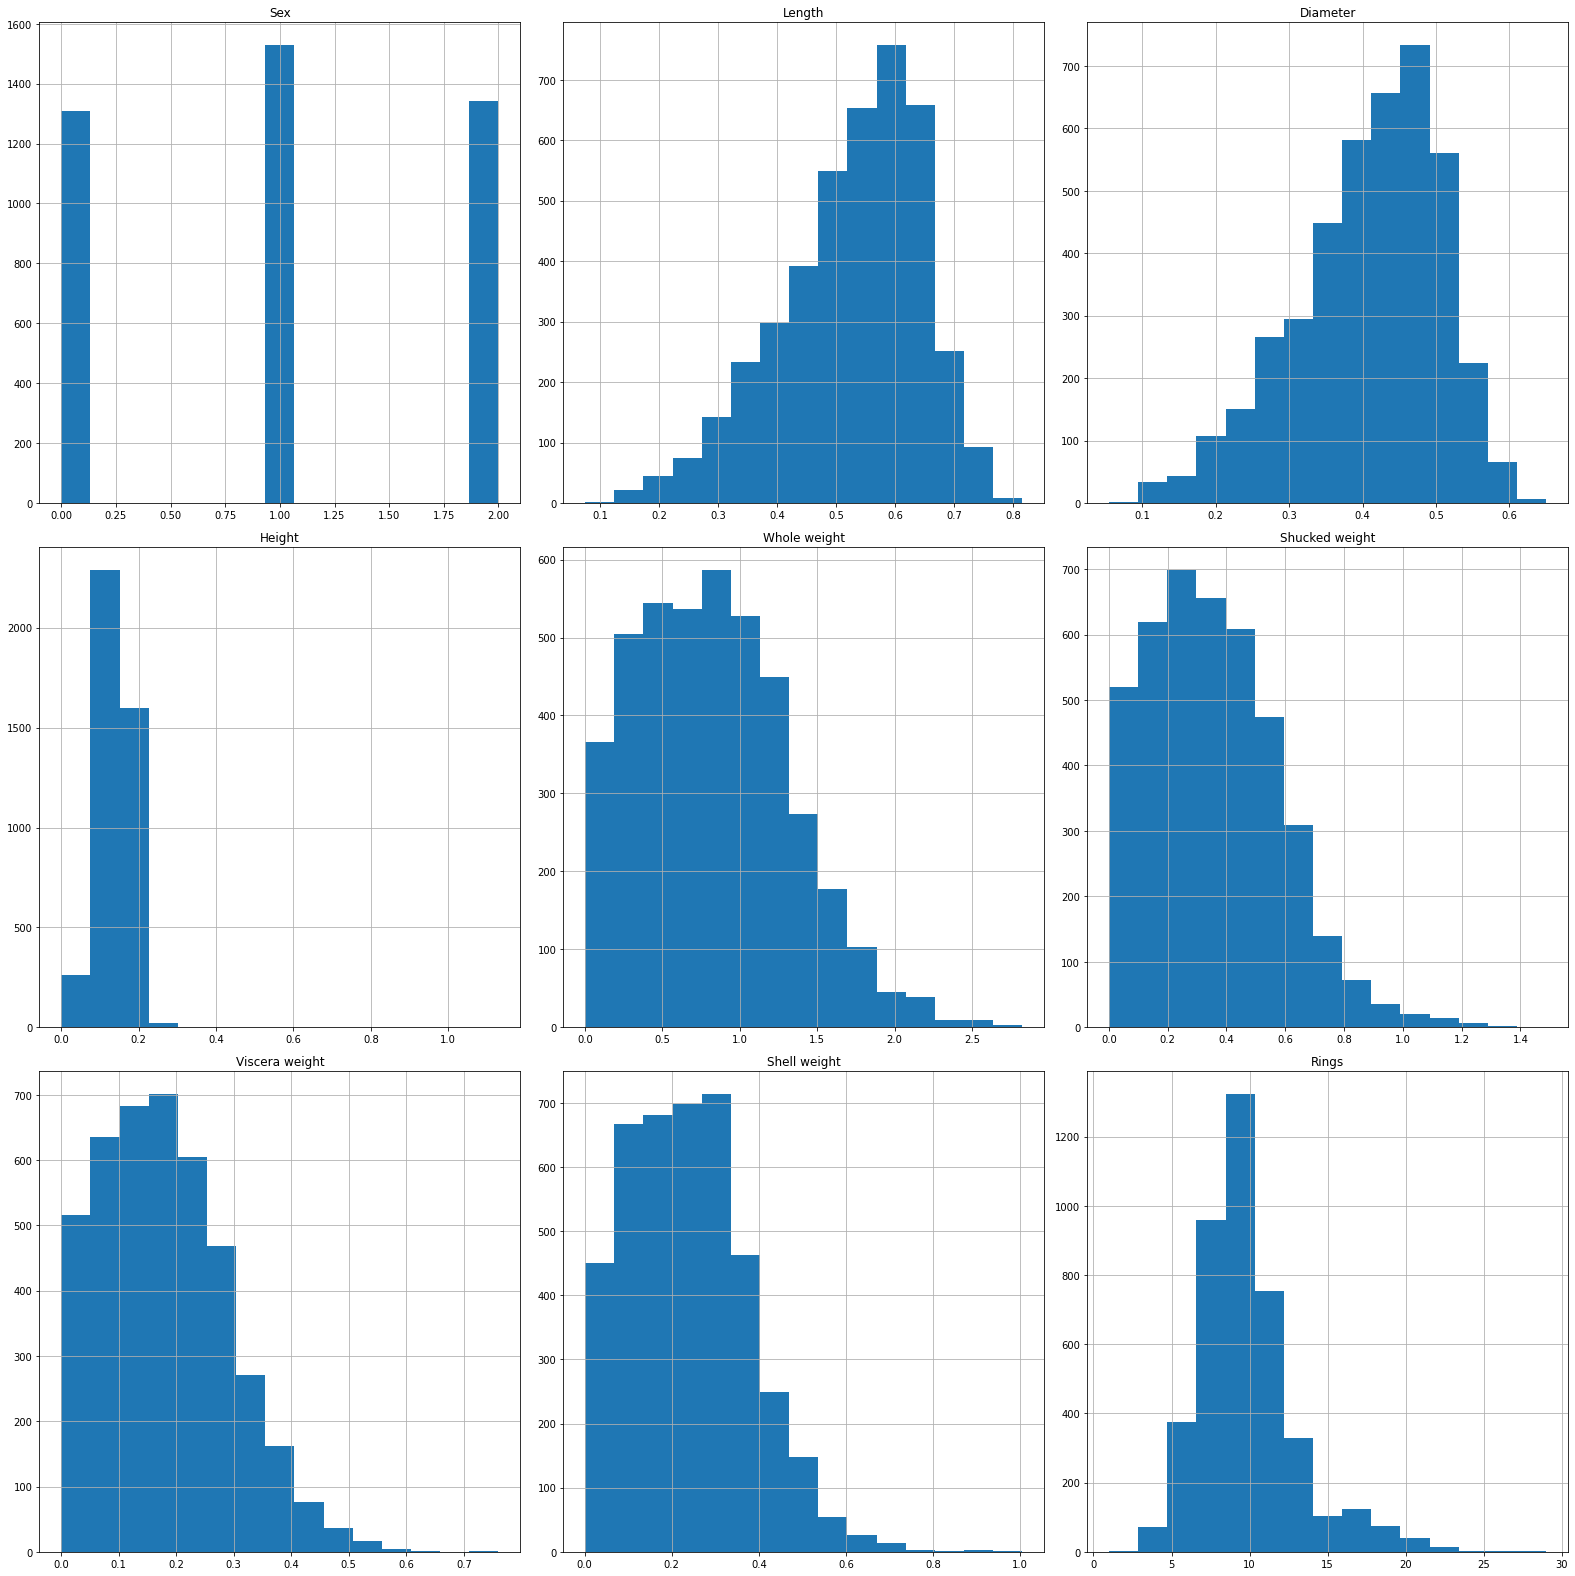

In [46]:
#importing matlab sub plot functions & pylab
import matplotlib.pyplot as plt

def draw_histograms(dff, var, number_rows, number_cols):
    fig= plt.figure(figsize=(22,22))
    for i, variable_name in enumerate(var):
        ax=fig.add_subplot(number_rows,number_cols,i+1)
        dff[variable_name].hist(bins=15,ax=ax)
        ax.set_title(variable_name)
    fig.tight_layout()  
    plt.show()

draw_histograms(abalone, colnames, 3, 3)

> TODO: Which of the column data are skewed and in which direction? 

If we loo closely we will see 

length , diameter and height are negatively skewed

all the weights and rings are positively skewed

## Part 3: Scatter plots

> TODO: Now ceate a grid of scatter plots for each column vs the "Rings" column. Use color to distinguish the sex of the specimen in each plot. Make titles of the form "&lt;colname&gt; vs Rings". Its fine to include "Rings vs Rings" as the last plot.

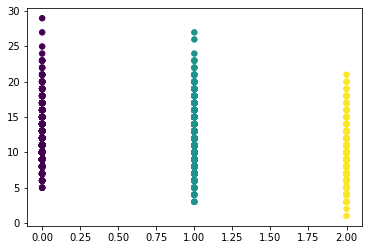

In [63]:
# Sex vs Rings
import pylab
rings = getcol("Rings")
sex = getcol("Sex")

pylab.scatter(sex, rings , c=getcol('Sex'), s=30)

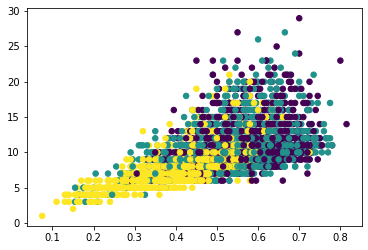

In [62]:
# length vs Rings

length = getcol("Length")

pylab.scatter(length, rings , c=getcol('Sex'), s=30)

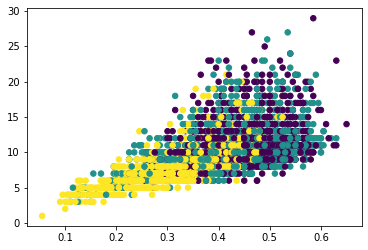

In [67]:
# diameter vs Rings

diameter = getcol("Diameter")

pylab.scatter(diameter, rings , c=getcol('Sex'), s=30)

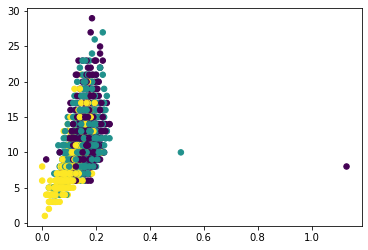

In [65]:
# Height vs Rings

height = getcol("Height")

pylab.scatter(height, rings , c=getcol('Sex'), s=30)

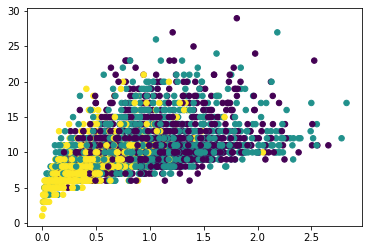

In [68]:
# Whole Weight vs Rings

wweight = getcol("Whole weight")

pylab.scatter(wweight, rings , c=getcol('Sex'), s=30)

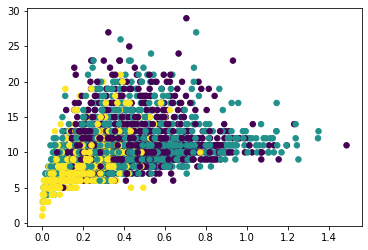

In [69]:
# Shucked Weight vs Rings

sweight = getcol("Shucked weight")

pylab.scatter(sweight, rings , c=getcol('Sex'), s=30)

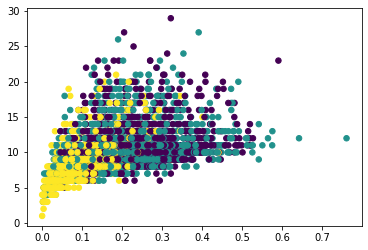

In [70]:
# Viscera Weight vs Rings

vweight = getcol("Viscera weight")

pylab.scatter(vweight, rings , c=getcol('Sex'), s=30)

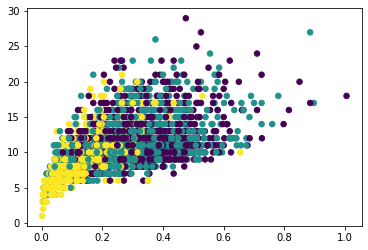

In [71]:
# Shell Weight vs Rings

shweight = getcol("Shell weight")

pylab.scatter(shweight, rings , c=getcol('Sex'), s=30)

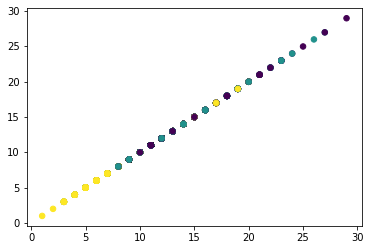

In [72]:
# Rings vs Rings

pylab.scatter(rings , rings , c=getcol('Sex'), s=30)

> TODO: Do you notice any issues with the dataset? e.g. outliers?

There are two outliers in height vs Rings

## Part 4: Regression lines

Add regression lines to the scatter plots.

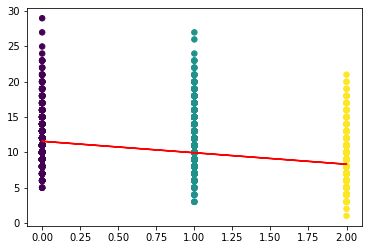

In [74]:
# sex vs rings

import numpy as np

sex = np.array(getcol('Sex'))
rings = np.array(getcol('Rings'))

pylab.scatter(sex, rings ,c=getcol('Sex'), s=30 )
m, b = np.polyfit(sex, rings, 1)
pylab.plot(sex, m*sex + b, '-', color='red')


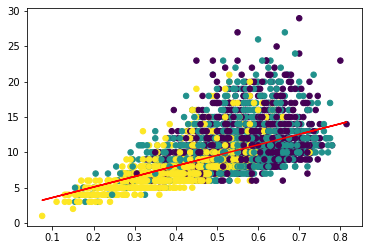

In [75]:
#length vs rings

length = np.array(getcol('Length'))
rings = np.array(getcol('Rings'))

pylab.scatter(length, rings ,c=getcol('Sex'), s=30 )
m, b = np.polyfit(length, rings, 1)
pylab.plot(length, m*length + b, '-', color='red')


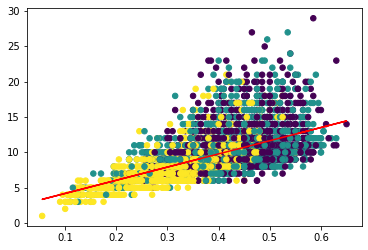

In [76]:
#diameter vs rings

diameter = np.array(getcol('Diameter'))
rings = np.array(getcol('Rings'))

pylab.scatter(diameter, rings ,c=getcol('Sex'), s=30 )
m, b = np.polyfit(diameter, rings, 1)
pylab.plot(diameter, m*diameter + b, '-', color='red')

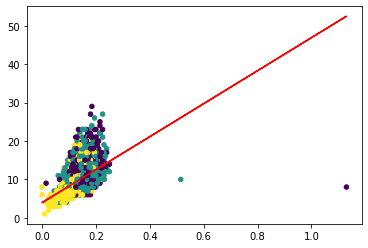

In [79]:
#height vs rings

height = np.array(getcol('Height'))
rings = np.array(getcol('Rings'))

pylab.scatter(height, rings ,c=getcol('Sex'), s=20 )
m, b = np.polyfit(height, rings, 1)
pylab.plot(height, m*height + b, '-', color='red')

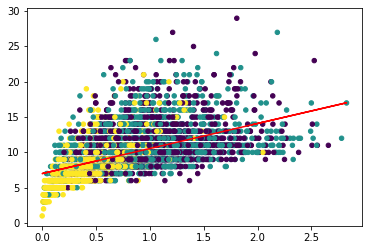

In [80]:
#Whole weight vs rings

wweight = np.array(getcol('Whole weight'))
rings = np.array(getcol('Rings'))

pylab.scatter(wweight, rings ,c=getcol('Sex'), s=20 )
m, b = np.polyfit(wweight, rings, 1)
pylab.plot(wweight, m*wweight + b, '-', color='red')

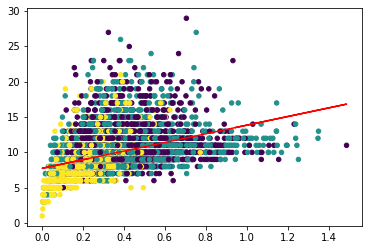

In [81]:
#Shucked weight vs rings

sweight = np.array(getcol('Shucked weight'))
rings = np.array(getcol('Rings'))

pylab.scatter(sweight, rings ,c=getcol('Sex'), s=20 )
m, b = np.polyfit(sweight, rings, 1)
pylab.plot(sweight, m*sweight + b, '-', color='red')

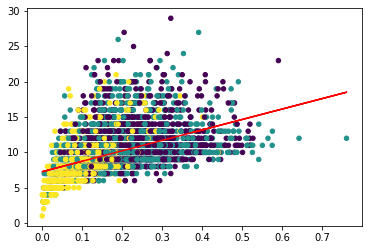

In [82]:
#Viscera weight vs rings

vweight = np.array(getcol('Viscera weight'))
rings = np.array(getcol('Rings'))

pylab.scatter(vweight, rings ,c=getcol('Sex'), s=20 )
m, b = np.polyfit(vweight, rings, 1)
pylab.plot(vweight, m*vweight + b, '-', color='red')

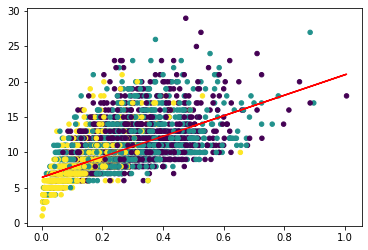

In [83]:
#Shell weight vs rings

shweight = np.array(getcol('Shell weight'))
rings = np.array(getcol('Rings'))

pylab.scatter(shweight, rings ,c=getcol('Sex'), s=20 )
m, b = np.polyfit(shweight, rings, 1)
pylab.plot(shweight, m*shweight + b, '-', color='red')

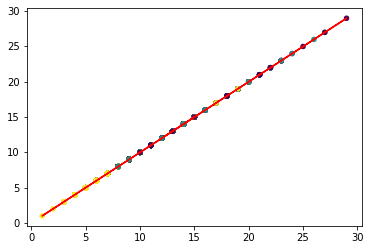

In [84]:
#rings vs rings


rings = np.array(getcol('Rings'))

pylab.scatter(rings, rings ,c=getcol('Sex'), s=20 )
m, b = np.polyfit(rings, rings, 1)
pylab.plot(rings, m*rings + b, '-', color='red')

## Part 5: Prediction Error

> TODO: Next we would like to explore prediction, and find the feature that gives the best (lowest error) predictions of number of rings. You can do this with polyfit, once again predicting the Rings feature from one of the others, by adding an option to return the "residual" of the fit, which is a measure of its prediction error. Read the documentation for polyfit on how to do this. Then make a 3 x 3 array of residuals. 

In [47]:
residuals = np.zeros([3,3])

x = 0
for i in range(0,3):
    for j in range(1,4):
      # TODO get the residuals returned by polyfit
        a,residuals[i,j-1],c,d,e = np.polyfit(abalone[colnames[x]], abalone['Rings'] , 1, full=True)
        print(colnames[x],i+1,j)
        x = x+1

residuals

Sex 1 1
Length 1 2
Diameter 1 3
Height 2 1
Whole weight 2 2
Shucked weight 2 3
Viscera weight 3 1
Shell weight 3 2
Rings 3 3


array([[3.64146651e+04, 2.99560836e+04, 2.90749668e+04],
       [2.99199168e+04, 3.07338147e+04, 3.57207389e+04],
       [3.23915437e+04, 2.63133893e+04, 3.75152723e-24]])

> TODO: What feature gives the smallest residual (other than Rings of course)?

According to data , Shell weight gives the smallest residual

The residuals are sums of the squared error for all the predictions. A more useful measure is the RMS (root-mean-squared) distance for each point. This is an estimate of how far the actual rings count for a specimen is from its prediction. From the residuals above, compute the RMS value for each residual. 

In [48]:
rms_residuals = np.sqrt(residuals/abalone.shape[0])# TODO
rms_residuals

array([[2.95260889e+00, 2.67799819e+00, 2.63831943e+00],
       [2.67638109e+00, 2.71253904e+00, 2.92434077e+00],
       [2.78473315e+00, 2.50989849e+00, 2.99689698e-14]])

## Part 6: Significance

So far we have studied prediction without worrying about chance. The linear regression coefficient between any two data sequences of the same size will normally be non-zero due to noise. This suggests that one sequence "predicts" the other. e.g. pick a random woman and man from a room, then their ages are almost surely different. The age and gender attributes predict each other perfectly on this sample, but the direction of influence is completely arbitrary! Obviously this doesnt generalize.

Statistical tests measure the likelihood that an observation may be due to chance if there is no "real" influence between two variables. The probability of the observations due to chance when there is no influence is called a p-value. You want this probability to be small, say less than 0.01. 

> TODO: Use the 'lingress' function from scipy.stats to perform linear fits between each data column and the rings column. Save the pvalues it returns for each fit into a 3 x 3 array. 

In [49]:
from scipy.stats import linregress
pvalues = np.zeros([3,3])
# TODO: fill in the pvalues array
x = 0
for i in range(0,3):
    for j in range(1,4):
        m,b,r,pvalues[i,j-1],s = linregress(abalone[colnames[x]], abalone['Rings'])
        print(colnames[x],i+1,j)
        x = x+1
pvalues

Sex 1 1
Length 1 2
Diameter 1 3
Height 2 1
Whole weight 2 2
Shucked weight 2 3
Viscera weight 3 1
Shell weight 3 2
Rings 3 3


array([[1.47873735e-161, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 5.08746422e-179],
       [8.57472644e-268, 0.00000000e+000, 0.00000000e+000]])

> TODO: Are all the p-values less than 0.01 ?

According to the result given, Yes , all the p-values are less than 0.01.

###Submission###

